# Feature Permutation
Feature permutation is a feature selection algorithm that evaluates the importance of each feature in predicting the target.

Trains and scores a base model with all features
Randomly shuffles (permutation) a feature
Trains and scores a model with shuffled feature
Compares the new score to the original score
Repeat for each feature

In [4]:
#Load Cleaned Dataset
import pandas as pd

df_t = pd.read_csv("transaction_data.csv")
df_id = pd.read_csv("identity_data.csv")

# Concatenate on TransactionID
frames = [df_t, df_id]

data = pd.concat(frames, join='inner', axis = 1)

/Users/johannagerdts/.pyenv/versions/3.7.7/envs/project_fraud/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (6,8,9,13,14,15,16,17,18,19,27,29,30,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id-17,id-19,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38
0,2987000.0,0.0,86400.0,68.5,W,13926.0,363.099769,150.0,discover,142.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001.0,0.0,86401.0,29.0,W,2755.0,404.000000,150.0,mastercard,102.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002.0,0.0,86469.0,59.0,W,4663.0,490.000000,150.0,visa,166.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003.0,0.0,86499.0,50.0,W,18132.0,567.000000,150.0,mastercard,117.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004.0,0.0,86506.0,50.0,H,4497.0,514.000000,150.0,mastercard,102.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30187,3017187.0,0.0,760169.0,25.0,H,9803.0,583.000000,150.0,visa,226.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30188,3017188.0,0.0,760215.0,80.0,W,12839.0,321.000000,150.0,visa,226.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30189,3017189.0,0.0,760216.0,33.0,W,18132.0,567.000000,150.0,mastercard,117.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30190,3017190.0,0.0,760223.0,15.0,S,2616.0,327.000000,150.0,discover,223.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
c = (new_df.dtypes == 'object')
n = (new_df.dtypes != 'object')
cat_trans_cols = list(c[c].index)
num_trans_cols = list(n[n].index) 

print(cat_trans_cols, "\n")
print("number categorical transaction features: ", len(cat_trans_cols), "\n\n")
print(num_trans_cols, "\n")
print("number numerical transaction features: ", len(num_trans_cols), "\n\n")



['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'id-12', 'id-15', 'id-16', 'id-28', 'id-29', 'id-31', 'id-35', 'id-36', 'id-37', 'id-38'] 

number categorical transaction features:  34 


['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V

In [7]:
data.isna().sum() #columns with missing values

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                  ...  
id-31             30192
id-35             30192
id-36             30192
id-37             30192
id-38             30192
Length: 266, dtype: int64

# Visualize Missing Values in Df

<AxesSubplot:>

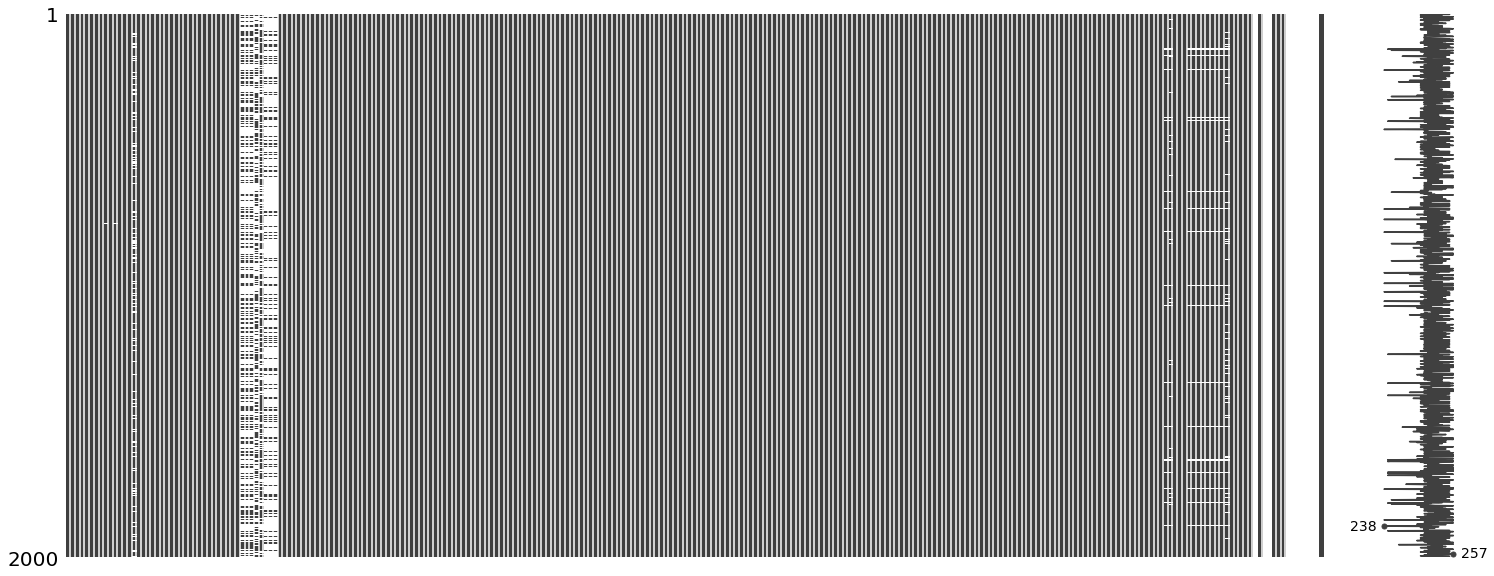

In [13]:
import missingno as msno
%matplotlib inline

msno.matrix(new_df.sample(2000))
#fail

# PCA

In [ ]:
X = new_df.drop(columns=['isFraud'])
y = new_df.isFraud

#Data must be centered around their mean before apply PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

pd.DataFrame(X)

# Find Rows with High NaNs

In [10]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

rows_with_NaN

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id-17,id-19,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38
0,2987000.0,0.0,86400.0,68.5,W,13926.0,363.099769,150.0,discover,142.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001.0,0.0,86401.0,29.0,W,2755.0,404.000000,150.0,mastercard,102.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002.0,0.0,86469.0,59.0,W,4663.0,490.000000,150.0,visa,166.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003.0,0.0,86499.0,50.0,W,18132.0,567.000000,150.0,mastercard,117.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004.0,0.0,86506.0,50.0,H,4497.0,514.000000,150.0,mastercard,102.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30187,3017187.0,0.0,760169.0,25.0,H,9803.0,583.000000,150.0,visa,226.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30188,3017188.0,0.0,760215.0,80.0,W,12839.0,321.000000,150.0,visa,226.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30189,3017189.0,0.0,760216.0,33.0,W,18132.0,567.000000,150.0,mastercard,117.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30190,3017190.0,0.0,760223.0,15.0,S,2616.0,327.000000,150.0,discover,223.0,...,166.0,321.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import numpy as np

list_NaN_rows = []
index = []
for i in range(len(new_df.index)) :
    NaN_rows = np.array(new_df.iloc[i].isnull().sum())
    list_NaN_rows.append(NaN_rows)
    index.append(i)
    #print("Nan in row ", i , " : " ,  NaN_rows)


In [ ]:
#Sort rows by NaN values

In [12]:
new_df['sum_nans'] = list_NaN_rows  
new_df['sum_nans'].sort_values()

15095    10
4033     10
4034     10
21302    10
4054     10
         ..
13709    30
23915    30
10338    30
28955    30
24813    30
Name: sum_nans, Length: 30192, dtype: object

# VIF

In [18]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# compute VIF factor for feature index 0
vif(data.values, 0)


ModuleNotFoundError: No module named 'statsmodels'

In [15]:
data["vif_index"] = [vif(data.values, i) for i in range(data.shape[1])]
data["features"] = data.columns
data

NameError: name 'vif' is not defined

#Does not make sense to drop rows because not many NaN values per row (max 30)

In [ ]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
missing_value_df = pd.DataFrame({'row_name': rows_with_NaN,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

missing_value_df

In [ ]:

vif analysis
pca 

need to use dataset from Gilles as the imputation was wrong...

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_features = cat_trans_cols

ohe = OneHotEncoder(sparse = False)

ohe.fit(cat_trans_cols)

features_oh = ohe.transform(cat_trans_cols[[df_features]])

for feature in df_features.columns:
    df_features[feature] = ohe.transform(df_features[[feature]])

    

In [ ]:
import seaborn as sns

sns.heatmap(data.corr(), cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(sparse = False)

ohe.fit(data[['FEATURE']]) #insert feature to be encoded

feature_oh = ohe.transform(new_df[['prefers']])

#df["prefer_chocolate"],df["prefer_pistachio"],df['prefer_vanilla'] = hair_length_oh.T

In [ ]:
#NEEDS TO BE ENCODED TO WORK

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Define X and y where X is numerical features
X = data[['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'id-12', 'id-15', 'id-16', 'id-28', 'id-29', 'id-31', 'id-35', 'id-36', 'id-37', 'id-38']]
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=2)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_test, y_test)

from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{new_df[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")



In [ ]:
import os, sys
from scipy import stats
import numpy as np

for index, line in enumerate(open('data2.txt', 'r').readlines()):
    w = line.split(' ')
    l1 = w[1:8]
    l2 = w[8:15]

    try:
        list1 = map(float, l1)
        list2 = map(float, l2)
    except ValueError:
        print 'Line {i} is corrupt!'.format(i = index)'
        break

    result = stats.ttest_ind(list1, list2)
    print result[1]

In [ ]:
from sklearn.inspection import permutation_importance

permutation_score = permutation_importance(log_model, X_train, y_train, n_repeats=100)

np.vstack((X.columns, permutation_score.importances_mean)).T

In [ ]:
data['TransactionID']
data['card1']
data['card2']
data['TransactionAmt_to_mean_card1']
data['addr1']
data['TransactionAmt_to_std_card1']
data['TransactionAmt']
data['PCA_V_13']
data['TransactionAmt_to_std_card4']
data['card5']
data['D8']
data['TransactionAmt_to_mean_card4']
data['PCA_V_29']
data['PCA_V_14']
data['PCA_V_27']
data['PCA_V_23']
data['dist1']
data['PCA_V_17']
data['D15']
data['PCA_V_26']


In [ ]:
data['card1']
data['_card2__addr1']
data['addr1']
data['_weekday__hour']
data['_count__card_all__addr1']
data['_count_rate']
data['_card1__card2']
data['_count_card1']
data['card2']
data['_amount_pct__card_all__addr1']
data['_P_emaildomain__addr1']
data['_card1_addr1']
data['_amount_fraction']
data['D15']
data['_amount_mean_P_emaildomain']
data['_count_card2']
data['_amount_std_P_emaildomain']
data['_vcol_pca0']
data['_amount_pct_card1']
data['_hour']
data['dist1']
data['C13']
data['D2']
data['D10']
data['D4']